In [1]:
import numpy as np
import pandas as pd
import keras
from PIL import Image
import os, shutil

Using TensorFlow backend.


In [2]:
original_dataset_dir="D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/Glass and Table_model/glass_and_table_dataset/training/training"

In [3]:
base_dir = 'D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir\Complte chptrs 5 material\Glass and Table_model\working directory'

In [3]:
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_glass_dir = os.path.join(train_dir, 'glass')
os.mkdir(train_glass_dir)
train_tables_dir = os.path.join(train_dir, 'tables')
os.mkdir(train_tables_dir)
validation_glass_dir = os.path.join(validation_dir, 'glass')
os.mkdir(validation_glass_dir)
validation_table_dir = os.path.join(validation_dir, 'tables')
os.mkdir(validation_table_dir)
test_glass_dir = os.path.join(test_dir, 'glass')
os.mkdir(test_glass_dir)
test_tables_dir = os.path.join(test_dir, 'tables')
os.mkdir(test_tables_dir)

# Train Data

In [12]:
fnames = ['glass_{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_glass_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

In [13]:
fnames = ['table_{}.jpg'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_tables_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

# Validation data

In [14]:
fnames = ['glass_{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_glass_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

In [16]:
fnames = ['table_{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_table_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

# Test data

In [17]:
fnames = ['glass_{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_glass_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

In [19]:
fnames = ['table_{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_tables_dir, fname) 
    shutil.copyfile(src, dst)
 #copy images from one to another

In [21]:
print('total training cat images:', len(os.listdir(train_glass_dir)))

print('total training dog images:', len(os.listdir(train_tables_dir)))

print('total validation cat images:', len(os.listdir(validation_glass_dir)))

print('total validation dog images:', len(os.listdir(validation_table_dir)))

print('total test cat images:', len(os.listdir(test_glass_dir)))

print('total test dog images:', len(os.listdir(test_tables_dir)))

total training cat images: 999
total training dog images: 999
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [31]:
img=Image.open('D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/Glass and Table_model/working directory/train/glass/glass_10.jpg')

In [32]:
imgarray=np.asarray(img)
imgarray.shape

(800, 800, 3)

# Building your network


In [33]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Dense Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Configuring the model for training


In [35]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

# Data preprocessing

In [36]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fitting the model using a batch generator

In [37]:
history = model.fit_generator(train_generator,steps_per_epoch=100,
                              epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 115s 1s/step - loss: 0.5758 - acc: 0.6952 - val_loss: 0.2125 - val_acc: 0.8440
Epoch 2/30
100/100 [==============================] - 86s 855ms/step - loss: 0.3826 - acc: 0.8363 - val_loss: 0.4718 - val_acc: 0.8850
Epoch 3/30
100/100 [==============================] - 87s 871ms/step - loss: 0.3176 - acc: 0.8659 - val_loss: 0.0993 - val_acc: 0.8960
Epoch 4/30
100/100 [==============================] - 87s 869ms/step - loss: 0.2916 - acc: 0.8794 - val_loss: 0.2102 - val_acc: 0.9030
Epoch 5/30
100/100 [==============================] - 88s 883ms/step - loss: 0.2582 - acc: 0.8974 - val_loss: 0.1203 - val_acc: 0.9010
Epoch 6/30
100/100 [==============================] - 87s 874ms/step - loss: 0.2347 - acc: 0.9129 - val_loss: 0.1467 - val_acc: 0.8710
Epoch 7/30
100/100 [==============================] - 89s 886ms/step - loss: 0.2110 - acc: 0.9179 - val_loss: 0.1012 - val_acc: 0.9110
Epoch 8/30
100/100 [==============================] - 90s

# Displaying curves of loss and accuracy during training

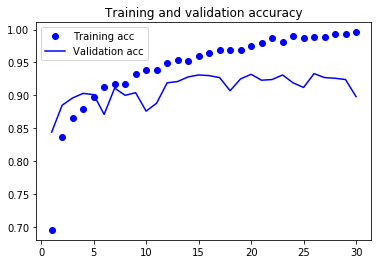

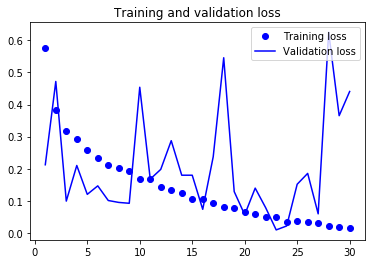

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Using data augmentation
Defining a new convnet that includes dropout

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [42]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 150s 2s/step - loss: 0.6217 - acc: 0.6470 - val_loss: 0.4337 - val_acc: 0.8452
Epoch 2/100
100/100 [==============================] - 157s 2s/step - loss: 0.4884 - acc: 0.7640 - val_loss: 0.3572 - val_acc: 0.8447
Epoch 3/100
100/100 [==============================] - 164s 2s/step - loss: 0.4354 - acc: 0.8031 - val_loss: 0.2268 - val_acc: 0.8813
Epoch 4/100
100/100 [==============================] - 156s 2s/step - loss: 0.4089 - acc: 0.8193 - val_loss: 0.7520 - val_acc: 0.7519
Epoch 5/100
100/100 [==============================] - 155s 2s/step - loss: 0.3949 - acc: 0.8164 - val_loss: 0.4420 - val_acc: 0.8014
Epoch 6/100
100/100 [==============================] - 160s 2s/step - loss: 0.3581 - acc: 0.8477 - val_loss: 0.2473 - val_acc: 0.9027
Epoch 7/100
100/100 [==============================] - 153s 2s/step - loss: 0.3585 - acc: 0.8448 - val_loss: 0.4

# Displaying curves of loss and accuracy during training

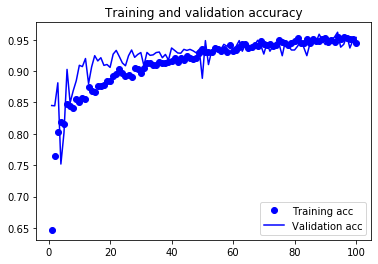

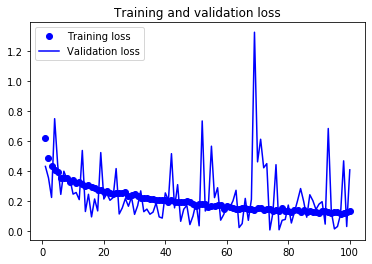

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [45]:
model.save("Cats_and_Dogs_Model.h5")